In [1]:
# import libraries
import datetime as dt
import pandas as pd
import numpy as np

# never print matching warnings
import warnings
warnings.filterwarnings('ignore')

# classic division semantics in a module
from __future__ import division

#for data visualization
import plotly.offline as pyoff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# initiate the Plotly Notebook mode to use plotly offline
init_notebook_mode(connected=True)

In [3]:
# load sales data to dataframe
data = pd.read_csv('OnlineRetail.csv',header=0, encoding = 'unicode_escape')
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50,4.95,12680.0,France


In [4]:
# seeing full summary of the retail data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# there are null data in description and the CustomerID columns
# check null data
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# clean null data and get data statistics summarize 
dropna = data.dropna(subset=['CustomerID'])
dropna.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
# check duplicates data
dropna.duplicated().sum()

5225

In [8]:
# clean duplicated data and get data statistics summarize 
dropdup = dropna.drop_duplicates()
dropdup.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
# the min for unit price = 0 and the min for Quantity is a negative value
# clean up negative values most likely from refunds
retail_data = dropdup[(dropdup['Quantity'] > 0) & (dropdup['UnitPrice'] > 0)]
retail_data.describe() 

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [10]:
# checking data set size
retail_data.shape

(392692, 8)

In [11]:
# convert InvoiceDate to datetime from string
retail_data['InvoiceDate'] = pd.to_datetime(retail_data['InvoiceDate'])

# add in InvoicePeriod to determine invoice month
retail_data['InvoicePeriod'] = retail_data['InvoiceDate'].map(lambda x: x.strftime('%Y-%m'))
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoicePeriod
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12


In [12]:
# calculate monthly revenue and create a new dataframe with InvoicePeriod and Revenue columns
retail_data['Revenue'] = retail_data['UnitPrice'] * retail_data['Quantity']
retail_revenue = retail_data.groupby(['InvoicePeriod'])['Revenue'].sum().round().reset_index()
retail_revenue

,InvoicePeriod,Revenue
0,2010-12,570423.0
1,2011-01,568101.0
2,2011-02,446085.0
3,2011-03,594082.0
4,2011-04,468374.0
5,2011-05,677355.0
6,2011-06,660046.0
7,2011-07,598963.0
8,2011-08,644051.0
9,2011-09,950690.0


In [13]:
# drop december 2011 data since it is incomplete, last invoice order date is 2011-12-09
revenue = retail_revenue.drop(retail_revenue.index[12])
revenue

,InvoicePeriod,Revenue
0,2010-12,570423.0
1,2011-01,568101.0
2,2011-02,446085.0
3,2011-03,594082.0
4,2011-04,468374.0
5,2011-05,677355.0
6,2011-06,660046.0
7,2011-07,598963.0
8,2011-08,644051.0
9,2011-09,950690.0


In [14]:
# graph monthly revenue 
revenue_data = [go.Scatter(x = revenue['InvoicePeriod'],
                                   y = revenue['Revenue'])]

plot_layout = go.Layout(xaxis = dict(title = 'Date', type = 'category'),
                        yaxis = {'title':'Revenue $'},
                        title = 'Total Monthly Revenue')

fig = go.Figure(data = revenue_data, layout = plot_layout)
pyoff.iplot(fig)

In [15]:
# calculate monthly revenue growth rate
# using pct_change() function to see monthly percentage change
revenue['MonthlyGrowth%'] = (retail_revenue['Revenue'].pct_change()*100).round()
growth = revenue.dropna()
growth

,InvoicePeriod,Revenue,MonthlyGrowth%
1,2011-01,568101.0,-0.0
2,2011-02,446085.0,-21.0
3,2011-03,594082.0,33.0
4,2011-04,468374.0,-21.0
5,2011-05,677355.0,45.0
6,2011-06,660046.0,-3.0
7,2011-07,598963.0,-9.0
8,2011-08,644051.0,8.0
9,2011-09,950690.0,48.0
10,2011-10,1035642.0,9.0


In [16]:
# graph monthly revenue growth rate 
mrg_data = [go.Scatter(x = growth['InvoicePeriod'],
                               y = growth['MonthlyGrowth%'])]

plot_layout = go.Layout(xaxis = dict(title = 'Date', type = 'category'),
                        yaxis = {'title':'Growth %'},
                        title = 'Monthly Revenue Growth Rate')

fig = go.Figure(data = mrg_data, layout=plot_layout)
pyoff.iplot(fig)

In [17]:
# monthly customers
#creating monthly customers dataframe by counting unique Customer IDs
customers = retail_data.groupby('InvoicePeriod')['CustomerID'].nunique().reset_index()

# drop december 2011 data since it is incomplete
monthly_customers = customers.drop(customers.index[12])
monthly_customers

,InvoicePeriod,CustomerID
0,2010-12,885
1,2011-01,741
2,2011-02,758
3,2011-03,974
4,2011-04,856
5,2011-05,1056
6,2011-06,991
7,2011-07,949
8,2011-08,935
9,2011-09,1266


In [18]:
# graph the total customers each month
mc_data = [go.Bar(x = monthly_customers['InvoicePeriod'],
                  y = monthly_customers['CustomerID'])]

plot_layout = go.Layout(xaxis = dict(title = 'Date', type = 'category'),
                        yaxis = {'title':'Customers'},
                        title = 'Total Customers Each Month')

fig = go.Figure(data = mc_data, layout =plot_layout)
pyoff.iplot(fig)

In [19]:
# total items ordered
# creating total items ordered each month dataframe by using quantity field
orders = retail_data.groupby('InvoicePeriod')['Quantity'].sum().reset_index()

# drop december 2011 data since it is incomplete
total_items = orders.drop(customers.index[12])
total_items

,InvoicePeriod,Quantity
0,2010-12,311048
1,2011-01,348473
2,2011-02,265027
3,2011-03,347582
4,2011-04,291366
5,2011-05,372864
6,2011-06,363014
7,2011-07,367360
8,2011-08,397373
9,2011-09,543652


In [20]:
# graph total items ordered
items_data = [go.Bar(x = total_items['InvoicePeriod'],
                     y = total_items['Quantity'],)]

plot_layout = go.Layout(xaxis = dict(title = 'Date', type = 'category'),
                        yaxis = {'title':'Total Number of Items'},
                        title = 'Total Items Ordered Each Month')

fig = go.Figure(data = items_data, layout = plot_layout)
pyoff.iplot(fig)

In [21]:
# groupby customer ID and using the .min() function to find customers' first purchase date based on InvoiceDate coloumn
# create a dataframe contaning CustomerID and first purchase date
min_purchase = retail_data.groupby('CustomerID').InvoiceDate.min().reset_index()
min_purchase.columns = ['CustomerID','MinPurchaseDate']
min_purchase['FirstPurchasePeriod'] = min_purchase['MinPurchaseDate'].map(lambda x: x.strftime('%Y-%m'))
min_purchase.sample(5)

,CustomerID,MinPurchaseDate,FirstPurchasePeriod
1542,14450.0,2011-01-23 11:53:00,2011-01
1194,13967.0,2011-07-17 12:02:00,2011-07
1165,13927.0,2011-09-26 12:00:00,2011-09
2872,16256.0,2011-03-18 12:18:00,2011-03
2929,16344.0,2011-07-04 15:50:00,2011-07


In [22]:
# merge first purchase date column to our main dataframe
first_purchase = pd.merge(retail_data, min_purchase, on = 'CustomerID')
first_purchase.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoicePeriod,Revenue,MinPurchaseDate,FirstPurchasePeriod
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30,2010-12-01 08:26:00,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,2010-12-01 08:26:00,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00,2010-12-01 08:26:00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,2010-12-01 08:26:00,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,2010-12-01 08:26:00,2010-12


In [23]:
# create a column called UserType and assign New or Existing 
# if customer's invoice period is greater then the first purchase then they are an returning customer
first_purchase['UserType'] = 'New'
first_purchase.loc[first_purchase['InvoicePeriod'] > \
                   first_purchase['FirstPurchasePeriod'],'UserType'] = 'Existing'
first_purchase.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoicePeriod,Revenue,MinPurchaseDate,FirstPurchasePeriod,UserType
195150,566605,84596L,BISCUITS SMALL BOWL LIGHT BLUE,2,2011-09-13 16:27:00,0.42,13263.0,United Kingdom,2011-09,0.84,2011-01-18 16:31:00,2011-01,Existing
45597,580696,22197,POPCORN HOLDER,40,2011-12-05 16:04:00,0.85,17757.0,United Kingdom,2011-12,34.00,2010-12-02 17:17:00,2010-12,Existing
356894,567161,22666,RECIPE BOX PANTRY YELLOW DESIGN,12,2011-09-18 10:46:00,2.95,15947.0,United Kingdom,2011-09,35.40,2011-09-18 10:46:00,2011-09,New
155948,561051,23173,REGENCY TEAPOT ROSES,12,2011-07-24 13:11:00,8.15,16684.0,United Kingdom,2011-07,97.80,2010-12-16 17:34:00,2010-12,Existing
312477,556483,23301,GARDENERS KNEELING PAD KEEP CALM,1,2011-06-12 13:12:00,1.65,14823.0,United Kingdom,2011-06,1.65,2011-05-29 12:48:00,2011-05,Existing


In [24]:
#calculate the Revenue per month for each user type
user_type_revenue = first_purchase.groupby(['InvoicePeriod',
                                            'UserType'])['Revenue'].sum().round().reset_index()
user_type_revenue

,InvoicePeriod,UserType,Revenue
0,2010-12,New,570423.0
1,2011-01,Existing,275734.0
2,2011-01,New,292367.0
3,2011-02,Existing,288384.0
4,2011-02,New,157701.0
5,2011-03,Existing,394462.0
6,2011-03,New,199620.0
7,2011-04,Existing,346565.0
8,2011-04,New,121809.0
9,2011-05,Existing,553616.0


In [25]:
# drop december 2011 since there is incomplete data and drop december 2010 since everyone is new
# assumption is this online retailer opened for business in december 2010
user_type_revenue = user_type_revenue.drop(user_type_revenue.index[[0,23,24]])
user_type_revenue

,InvoicePeriod,UserType,Revenue
1,2011-01,Existing,275734.0
2,2011-01,New,292367.0
3,2011-02,Existing,288384.0
4,2011-02,New,157701.0
5,2011-03,Existing,394462.0
6,2011-03,New,199620.0
7,2011-04,Existing,346565.0
8,2011-04,New,121809.0
9,2011-05,Existing,553616.0
10,2011-05,New,123739.0


In [26]:
# graph new and existing customers revenue
ne_data = [go.Scatter(x = user_type_revenue.query("UserType == 'Existing'")['InvoicePeriod'],
                      y = user_type_revenue.query("UserType == 'Existing'")['Revenue'],
                      name = 'Existing'),
           
           go.Scatter(x = user_type_revenue.query("UserType == 'New'")['InvoicePeriod'],
                      y = user_type_revenue.query("UserType == 'New'")['Revenue'],
                      name = 'New')]

plot_layout = go.Layout(xaxis = dict(title='Date', type='category'),
                        yaxis = {'title':'Revenue $'},
                        title = 'New vs. Existing Customer Revenue Comparison')

fig = go.Figure(data = ne_data, layout=plot_layout)
pyoff.iplot(fig)

In [27]:
# new customer ratio
# create a dataframe that shows new user ratio 
# ratio = new user / existing user * 100
newUser_ratio = first_purchase.query("UserType == 'New'").groupby(['InvoicePeriod'])['CustomerID'].nunique() \
                / first_purchase.query("UserType == 'Existing'").groupby(['InvoicePeriod'])['CustomerID'].nunique() \
                * 100
newUser_ratio = newUser_ratio.round().reset_index()
newUser_ratio

,InvoicePeriod,CustomerID
0,2010-12,NaN
1,2011-01,129.0
2,2011-02,101.0
3,2011-03,87.0
4,2011-04,54.0
5,2011-05,37.0
6,2011-06,32.0
7,2011-07,25.0
8,2011-08,22.0
9,2011-09,31.0


In [28]:
# drop december 2011 data since it is incomplete, drop NA
# drop January 2011 since all the customers were new
newUser = newUser_ratio.dropna().drop(customers.index[[1,12]])
newUser

,InvoicePeriod,CustomerID
2,2011-02,101.0
3,2011-03,87.0
4,2011-04,54.0
5,2011-05,37.0
6,2011-06,32.0
7,2011-07,25.0
8,2011-08,22.0
9,2011-09,31.0
10,2011-10,36.0
11,2011-11,24.0


In [29]:
# graph new customer ratio
ncr_data = [go.Bar(x = newUser['InvoicePeriod'],
                   y = newUser['CustomerID'])]

plot_layout = go.Layout(xaxis = dict(title='Date', type='category'), 
                        yaxis = {'title':'Percent %'},
                        title = 'New Customer Ratio')

fig = go.Figure(data = ncr_data, layout = plot_layout)
pyoff.iplot(fig)

In [30]:
# cohort based retention rate
# identify which customer is active by looking at their revenue per month
user_purchase = retail_data.groupby(['CustomerID',
                                     'InvoicePeriod'])['Revenue'].sum().reset_index()
user_purchase.head()

,CustomerID,InvoicePeriod,Revenue
0,12346.0,2011-01,77183.60
1,12347.0,2010-12,711.79
2,12347.0,2011-01,475.39
3,12347.0,2011-04,636.25
4,12347.0,2011-06,382.52


In [31]:
# create retention matrix with crosstab
# crosstab function builds a cross-tabulation table that can show the frequency with which certain groups of data appear
retention = pd.crosstab(user_purchase['CustomerID'],
                        user_purchase['InvoicePeriod']).reset_index()
retention.head()

InvoicePeriod,CustomerID,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12347.0,1,1,0,0,1,0,1,0,1,0,1,0,1
2,12348.0,1,1,0,0,1,0,0,0,0,1,0,0,0
3,12349.0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,12350.0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [32]:
# create an array of dictionary which keeps retained & total customer count for each month
months = retention.columns[2:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoicePeriod'] = (selected_month)
    retention_data['TotalCustomerCount'] = retention[selected_month].sum()
    retention_data['RetainedCustomerCount'] = retention[(retention[selected_month] > 0)
                                                        & (retention[prev_month] > 0)][selected_month].sum()
    retention_array.append(retention_data)

In [33]:
# convert the array to dataframe and calculate retention rate
# retention rate = retained customer / total customers * 100 
retention = pd.DataFrame(retention_array)
retention['RetentionRate%'] = retention['RetainedCustomerCount']\
                              / retention['TotalCustomerCount'] * 100
retention

,InvoicePeriod,RetainedCustomerCount,TotalCustomerCount,RetentionRate%
0,2011-02,262,758,34.564644
1,2011-03,290,974,29.774127
2,2011-04,304,856,35.514019
3,2011-05,368,1056,34.848485
4,2011-06,410,991,41.372351
5,2011-07,365,949,38.461538
6,2011-08,388,935,41.497326
7,2011-09,425,1266,33.570300
8,2011-10,489,1364,35.850440
9,2011-11,622,1664,37.379808


In [34]:
# drop december 2011 since data is incomplete and round the retention rate
retention_rate = retention.drop(retention.index[[10]]).round()
retention_rate

,InvoicePeriod,RetainedCustomerCount,TotalCustomerCount,RetentionRate%
0,2011-02,262,758,35.0
1,2011-03,290,974,30.0
2,2011-04,304,856,36.0
3,2011-05,368,1056,35.0
4,2011-06,410,991,41.0
5,2011-07,365,949,38.0
6,2011-08,388,935,41.0
7,2011-09,425,1266,34.0
8,2011-10,489,1364,36.0
9,2011-11,622,1664,37.0


In [35]:
#graph retention rate
rr_data = [go.Scatter(x = retention_rate['InvoicePeriod'],
                      y = retention_rate['RetentionRate%'])]

plot_layout = go.Layout(xaxis = dict(title = 'Date', type = 'category'), 
                        yaxis = {'title':'Retention %'},
                        title = 'Monthly Retention Rate')

fig = go.Figure(data = rr_data, layout = plot_layout)
pyoff.iplot(fig)

In [36]:
# munge two columns regarding months: one is invoice month, the other is cohort month
# cohort month is the first month a specific customer shopped at this online retailer
def get_month(x):
    return dt.datetime(x.year, x.month, 1)
retail_data['InvoiceMonth'] = retail_data['InvoiceDate'].apply(get_month)
retail_data['CohortMonth'] = retail_data.groupby('CustomerID')['InvoiceMonth'].transform('min')

In [37]:
# cohort index is the month difference between invoice month and cohort month for each row
# deduction allows you to know the month lapse between first transaction and the last transaction
def get_date(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day
invoice_year, invoice_month, _ = get_date(retail_data, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date(retail_data, 'CohortMonth')
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month
retail_data['CohortIndex'] = (year_diff * 12 + month_diff + 1)

In [38]:
# convert CohortMonth to year-month format
retail_data['CohortMonth'] = retail_data['CohortMonth'].map(lambda x: x.strftime('%Y-%m'))
retail_data.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoicePeriod,Revenue,InvoiceMonth,CohortMonth,CohortIndex
184566,552695,23159,SET OF 5 PANCAKE DAY MAGNETS,12,2011-05-10 15:31:00,2.08,16320.0,Unspecified,2011-05,24.96,2011-05-01,2011-05,1
522255,580393,21109,LARGE CAKE TOWEL CHOCOLATE SPOTS,3,2011-12-04 10:51:00,1.95,16438.0,United Kingdom,2011-12,5.85,2011-12-01,2011-09,4
424386,573264,22663,JUMBO BAG DOLLY GIRL DESIGN,4,2011-10-28 12:36:00,2.08,14415.0,United Kingdom,2011-10,8.32,2011-10-01,2010-12,11
434063,574025,20832,RED FLOCK LOVE HEART PHOTO FRAME,24,2011-11-02 12:26:00,0.39,12748.0,United Kingdom,2011-11,9.36,2011-11-01,2010-12,12
101140,544903,22690,DOORMAT HOME SWEET HOME BLUE,2,2011-02-24 13:43:00,7.95,18065.0,United Kingdom,2011-02,15.90,2011-02-01,2010-12,3


In [39]:
# group cohortmonth, cohortindex and customerid to a dataframe
cohort_data = retail_data.groupby(['CohortMonth', 'CohortIndex']
                                 )['CustomerID'].apply(pd.Series.nunique).reset_index()

# use pivot table function to group into a two-dimensional table to provide multidimensional summarization of cohorts
# indect is CohortMonth
# first column in the chart are active customers by a specific month
# following column show how many remaining users are still using the service
cohort_count = cohort_data.pivot_table(index = 'CohortMonth', columns = 'CohortIndex',
                                       values = 'CustomerID')
cohort_count

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# from cohort_count you can calculate the retention rate for each cohort
cohort_size = cohort_count.iloc[:,0]
retention = cohort_count.divide(cohort_size, axis = 0)
retention.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.5,NaN,NaN,NaN,NaN,NaN
2011-06,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


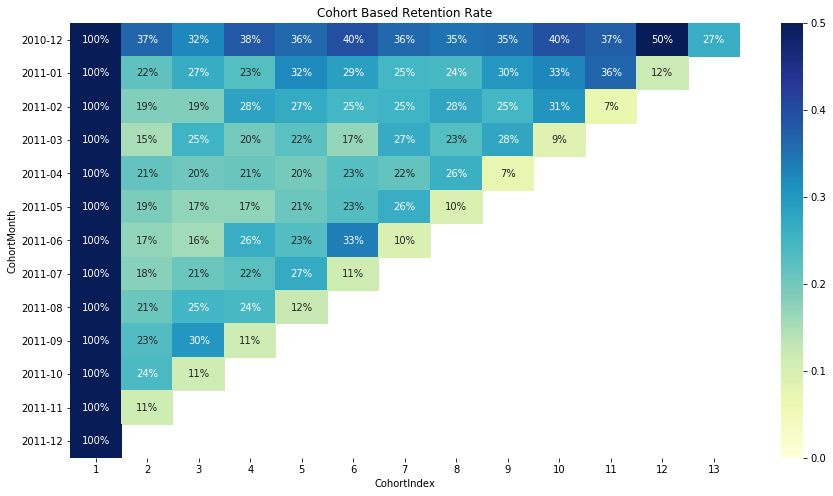

In [41]:
# graph cohert retention rate 
plt.figure(figsize=(15, 8))
plt.title('Cohort Based Retention Rate')
sns.heatmap(data = retention, 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0,
            vmax = 0.5,
            cmap = "YlGnBu")
plt.show()